# Notebook - Módulo 2

---
Daniel Zubieta Ambriz A01651206 https://github.com/Dazuam/SistemasInteligentes

Carlos Aguirre Orozco A01336319 https://github.com/Lucer9/Sistemas-

Axel Octavio Meinguer Estrada A01653448 https://github.com/alupusmc/SistemasInteligentes

Alister Estrada Cueto A01336767 https://github.com/AlisterEstrada/SistemasInteligente

### Bienvenidos a esta notebook con explicaciones más claras que el agua... 

---

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS-0p4mbBpdODWdMmOoLA72P-M-aOWK6iVrjg&usqp=CAU)

Nos encontramos en el Módulo 2 de la materia de Sistemas Inteligentes.

---

En el módulo anterior hemos platicado de diversas cosas y ahora es cuando se planea clarificar muchos detalles...

![alt text](https://i.pinimg.com/564x/ed/1b/64/ed1b64eed47dda3690290758b9d7dc82.jpg)

## Primero...
En la introducción a los Sistemas Inteligentes, podemos definir a la *inteligencia artificial* como el estudio de agentes racionales. 

Al final de cuentas, un agente racional puede ser algo o alguien que toma decisiones:
* Una persona
* Una máquina
* Un software...

Esto lo hace a través de:
   * Percibiendo el ambiente por medio de **sensores**
   * Interactuando con el ambiente por medio de **actuarios**
   
![alt text](https://www.geeksforgeeks.org/wp-content/uploads/AI1.png)

## CONTENIDO

---

* Overview
* Agent
* Environment
* Simple Agent and Environment
* Agents in a 2-D Environment

### OVERVIEW

La definición de agente es **ALGO o ALGUIEN** que percibe su ambiente por medio de sensores y interactua basado en un programa.
Mientras lo anterior suceda, podemos decir que eso es un agente.

---

In [1]:
from agents import *
from notebook import psource

### AGENTE

---

Veamos como pudieramos definir un agente. El siguiente ejemplo tenemos 2 metodos:

In [2]:
psource(Agent)

Donde:

* `__init__(self, program=None)`: The constructor defines various attributes of the Agent. These include

    * `alive`: which keeps track of whether the agent is alive or not 
    
    * `bump`: which tracks if the agent collides with an edge of the environment (for eg, a wall in a park)
    
    * `holding`: which is a list containing the `Things` an agent is holding, 
    
    * `performance`: which evaluates the performance metrics of the agent 
    
    * `program`: which is the agent program and maps an agent's percepts to actions in the environment. If no implementation is provided, it defaults to asking the user to provide actions for each percept.
    
* `can_grab(self, thing)`: Is used when an environment contains things that an agent can grab and carry. By default, an agent can carry nothing.

---

### AMBIENTE
Ahora, veamos como el ambiente se ha definido en AIMA.

In [3]:
psource(Environment)

La clase de `Environment` tiene muchos métodos! La mayoría de ellos son bastante sencillos pero en los siguientes ejercicios estaremos utilizando los siguientes:

* `thing_classes(self)`: Returns a static array of `Thing` sub-classes that determine what things are allowed in the environment and what aren't

* `add_thing(self, thing, location=None)`: Adds a thing to the environment at location

* `run(self, steps)`: Runs an environment with the agent in it for a given number of steps.

* `is_done(self)`: Returns true if the objective of the agent and the environment has been completed

Las siguientes dos funciones deben ser implementadas por cada subclase de `Environment`, para que el agente pueda percibir y ejecutar acciones.

* `percept(self, agent)`: Given an agent, this method returns a list of percepts that the agent sees at the current time

* `execute_action(self, agent, action)`: The environment reacts to an action performed by a given agent. The changes may result in agent experiencing new percepts or other elements reacting to agent input.

---
### AGENTE SIMPLE Y EL AMBIENTE

Definamos una clase `Agent` - un perro robot `ciego`... 

In [4]:
class RobotDog(Agent):
    def eat(self, thing):
        print("Dog: Ate food at {}.".format(self.location))
            
    def drink(self, thing):
        print("Dog: Drank water at {}.".format( self.location))

robot = RobotDog()

Can't find a valid program for RobotDog, falling back to default.


In [5]:
print(robot.alive)

True


![Cool dog](https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/sep-24-2019-11-37-27-1569339480.gif)

Nuestro perro robot está "hambriento" y necesita buscar comida. Para que haga esto tenemos que hacer un programa... Antes de todo esto se necesita un ambiente para que pueda interactuar, cierto? 

### AMBIENTE - Parque

Un ambiente sencillo (`park`) porque el perro puede percibir y actuar ahí. La clase <b>Environment</b> es una clase abstracta, por lo que tendríamos que crear nuestras propias subclases para poder usarla.

In [6]:
class Food(Thing):
    pass

class Water(Thing):
    pass

class Park(Environment):
    def percept(self, agent):
        '''return a list of things that are in our agent's location'''
        things = self.list_things_at(agent.location)
        return things
    
    def execute_action(self, agent, action):
        '''changes the state of the environment based on what the agent does.'''
        if action == "move down":
            print('{} decided to {} at location: {}'.format(str(agent)[1:-1], action, agent.location))
            agent.movedown()
        elif action == "eat":
            items = self.list_things_at(agent.location, tclass=Food)
            if len(items) != 0:
                if agent.eat(items[0]): #Have the dog eat the first item
                    print('{} ate {} at location: {}'
                          .format(str(agent)[1:-1], str(items[0])[1:-1], agent.location))
                    self.delete_thing(items[0]) #Delete it from the Park after.
        elif action == "drink":
            items = self.list_things_at(agent.location, tclass=Water)
            if len(items) != 0:
                if agent.drink(items[0]): #Have the dog drink the first item
                    print('{} drank {} at location: {}'
                          .format(str(agent)[1:-1], str(items[0])[1:-1], agent.location))
                    self.delete_thing(items[0]) #Delete it from the Park after.

    def is_done(self):
        '''By default, we're done when we can't find a live agent, 
        but to prevent killing our cute dog, we will stop before itself - when there is no more food or water'''
        no_edibles = not any(isinstance(thing, Food) or isinstance(thing, Water) for thing in self.things)
        dead_agents = not any(agent.is_alive() for agent in self.agents)
        return dead_agents or no_edibles

---

Ahora, tienen que interactuar de alguna manera...

In [7]:
class RobotDog(Agent):
    location = 1
    
    def movedown(self):
        self.location += 1
        
    def eat(self, thing):
        '''returns True upon success or False otherwise'''
        if isinstance(thing, Food):
            return True
        return False
    
    def drink(self, thing):
        ''' returns True upon success or False otherwise'''
        if isinstance(thing, Water):
            return True
        return False

Acciones que el perro robot tendría que hacer ante las cosas que se presenten en el ambiente.
<table>
    <tr>
        <td><b>Percibir:</b> </td>
        <td>Comida</td>
        <td>Agua</td>
        <td>Nada</td>
   </tr>
   <tr>
       <td><b>Actuar:</b> </td>
       <td>Comer</td>
       <td>Beber</td>
       <td>Muevete</td>
   </tr>
        
</table>

In [8]:
def program(percepts):
    '''Returns an action based on the dog's percepts'''
    for p in percepts:
        if isinstance(p, Food):
            return 'eat'
        elif isinstance(p, Water):
            return 'drink'
    return 'move down'

`Simulación`sencilla...

In [9]:
park = Park()
dog = RobotDog(program)
dogfood = Food()
water = Water()
park.add_thing(dog, 1)
park.add_thing(dogfood, 5) #Hemos definido que en la posición 5 del parque imaginario hay comida
park.add_thing(water, 7)   #Y en la posición 7 hay agua
park.run(5)

RobotDog decided to move down at location: 1
RobotDog decided to move down at location: 2
RobotDog decided to move down at location: 3
RobotDog decided to move down at location: 4
RobotDog ate Food at location: 5


Notamos que el perro empieza a *desplazarse* hasta encontrar comida y se detiene. Si añadimos que realice 5 pasos más, ¿qué sucederá?

In [10]:
park.run(5)

RobotDog decided to move down at location: 5
RobotDog decided to move down at location: 6
RobotDog drank Water at location: 7


Bien!, vemos que nuestro poderoso perro robot se ha detenido a tomar agua y ya no ha avanzado los últimos 3 pasos. Porque así fue como se ha definido su comprotamiento.
Si añadimos más cosas al ambiente, podemos hacer que el perro siga actuando.

In [11]:
park.add_thing(dogfood, 12)
park.add_thing(water, 15)
park.run(10)

RobotDog decided to move down at location: 7
RobotDog decided to move down at location: 8
RobotDog decided to move down at location: 9
RobotDog decided to move down at location: 10
RobotDog decided to move down at location: 11
RobotDog ate Food at location: 12
RobotDog decided to move down at location: 12
RobotDog decided to move down at location: 13
RobotDog decided to move down at location: 14
RobotDog drank Water at location: 15


### AGENTES EN UN AMBIENTE 2D

Para esta sección tendremos que definir una subclase para los *gráficos* -> *`GraphicEnvironment`* que incluya las siguientes propiedades: 

- Nuestro parque esta indexado en el 4to cuadrante de un plano X-Y
- Cada vez que creamos el ambiente gráfico *`GraphicEnvironment`*, necesitamos definir los colores de todas lsa cosas que planeamos poner en el parque. Los colores están definidos de la forma: [<b>RGB digital 8-bit format</b>](https://en.wikipedia.org/wiki/RGB_color_model#Numeric_representations)
- Las cercas se agregan automáticamente a todos los parques para que nuestro perro no salga de los límites del parque, ¡simplemente no es seguro para los perros ciegos estar solos fuera del parque! <b> GraphicEnvironment </b> proporciona la función `is_inbounds` para comprobar si nuestro perro intenta salir del parque.

---

*Actualicemos* nuestro parque de 1D a 2D reemplazando la superclase por `GraphicEnvironment`. 

In [12]:
class Park2D(GraphicEnvironment):
    def percept(self, agent):
        '''return a list of things that are in our agent's location'''
        things = self.list_things_at(agent.location)
        return things
    
    def execute_action(self, agent, action):
        '''changes the state of the environment based on what the agent does.'''
        if action == "move down":
            print('{} decided to {} at location: {}'.format(str(agent)[1:-1], action, agent.location))
            agent.movedown()
        elif action == "eat":
            items = self.list_things_at(agent.location, tclass=Food)
            if len(items) != 0:
                if agent.eat(items[0]): #Have the dog eat the first item
                    print('{} ate {} at location: {}'
                          .format(str(agent)[1:-1], str(items[0])[1:-1], agent.location))
                    self.delete_thing(items[0]) #Delete it from the Park after.
        elif action == "drink":
            items = self.list_things_at(agent.location, tclass=Water)
            if len(items) != 0:
                if agent.drink(items[0]): #Have the dog drink the first item
                    print('{} drank {} at location: {}'
                          .format(str(agent)[1:-1], str(items[0])[1:-1], agent.location))
                    self.delete_thing(items[0]) #Delete it from the Park after.
                    
    def is_done(self):
        '''By default, we're done when we can't find a live agent, 
        but to prevent killing our cute dog, we will stop before itself - when there is no more food or water'''
        no_edibles = not any(isinstance(thing, Food) or isinstance(thing, Water) for thing in self.things)
        dead_agents = not any(agent.is_alive() for agent in self.agents)
        return dead_agents or no_edibles

class RobotDog(Agent):
    location = [0,1] # change location to a 2d value
    direction = Direction("down") # variable to store the direction our dog is facing
    
    def movedown(self):
        self.location[1] += 1
        
    def eat(self, thing):
        '''returns True upon success or False otherwise'''
        if isinstance(thing, Food):
            return True
        return False
    
    def drink(self, thing):
        ''' returns True upon success or False otherwise'''
        if isinstance(thing, Water):
            return True
        return False

Ahora veamos que pasa... Nuestro perro robot es de color *rosado*, mientras que la comida y el agua serán de color naranja y azul, respectivamente.

In [13]:
park = Park2D(5,20, color={'RobotDog': (220,100,200), 'Water': (0, 200, 200), 'Food': (230, 115, 40)}) # park width is set to 5, and height to 20
dog = RobotDog(program)
dogfood = Food()
water = Water()
park.add_thing(dog, [0,1])
park.add_thing(dogfood, [0,5])
park.add_thing(water, [0,7])
morewater = Water()
park.add_thing(morewater, [0,15])
print("BlindDog starts at (1,1) facing downwards, lets see if he can find any food!")
park.run(20)

BlindDog starts at (1,1) facing downwards, lets see if he can find any food!


,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,


RobotDog decided to move down at location: [0, 1]


,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,


RobotDog decided to move down at location: [0, 2]


,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,


RobotDog decided to move down at location: [0, 3]


,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,


RobotDog decided to move down at location: [0, 4]


,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,


RobotDog ate Food at location: [0, 5]


,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,


RobotDog decided to move down at location: [0, 5]


,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,


RobotDog decided to move down at location: [0, 6]


,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,


RobotDog drank Water at location: [0, 7]


,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,


RobotDog decided to move down at location: [0, 7]


,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,


RobotDog decided to move down at location: [0, 8]


,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,


RobotDog decided to move down at location: [0, 9]


,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,


RobotDog decided to move down at location: [0, 10]


,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,


RobotDog decided to move down at location: [0, 11]


,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,


RobotDog decided to move down at location: [0, 12]


,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,


RobotDog decided to move down at location: [0, 13]


,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,


RobotDog decided to move down at location: [0, 14]


,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,


RobotDog drank Water at location: [0, 15]


,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,


,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,


Añadir gráficas ayuda mucho a entender mejor las cosas, creo...
Hagamos que el perro sea más *intrepido*, de tal forma que pueda en otras direcciones en lugar de ir solamente en una.

---

Para esto, tenemos que tambien hacer algunos cambios en el ambiente para que pueda haber un control de estas **actividades** extras.

### PROGRAMA - EnergeticRobotDog

Ahora añadamos un movimiento aleatorio al perro. Hagamos que gire o se mueva hacia adelante al azar, excepto cuando esté en el borde de nuestro parque, en cuyo caso le hacemos cambiar de dirección explícitamente girando para evitar tratar de salir del parque. Sin embargo, nuestro perro es ciego, por lo que no sabría qué camino tomar, tendría que intentarlo arbitrariamente.
<table>
    <tr>
        <td><b>Percibir:</b> </td>
        <td>Comida</td>
        <td>Agua</td>
        <td>Nada</td>
   </tr>
   <tr>
       <td><b>Actuar:</b> </td>
       <td>Comer</td>
       <td>Beber</td>
       <td>
       <table>
           <tr>
               <td><b>Borde ? : </b></td>
               <td>En el borde</td>
               <td>Lejos de borde</td>
           </tr>
           <tr>
               <td><b>Accion : </b></td>
               <td>Gira a la Izquierda / Derecha <br> ( 50% - 50% )</td>
               <td>Gira a la Izquierda / Derecha / Hacia adelante <br> ( 25% - 25% - 50% )</td>
           </tr>
       </table>
       </td>
   </tr>
        
</table>

In [14]:
from random import choice

class EnergeticRobotDog(Agent):
    location = [0,1]
    direction = Direction("down")
    
    def moveforward(self, success=True):
        '''moveforward possible only if success (i.e. valid destination location)'''
        if not success:
            return
        if self.direction.direction == Direction.R:
            self.location[0] += 1
        elif self.direction.direction == Direction.L:
            self.location[0] -= 1
        elif self.direction.direction == Direction.D:
            self.location[1] += 1
        elif self.direction.direction == Direction.U:
            self.location[1] -= 1
    
    def turn(self, d):
        self.direction = self.direction + d
        
    def eat(self, thing):
        '''returns True upon success or False otherwise'''
        if isinstance(thing, Food):
            return True
        return False
    
    def drink(self, thing):
        ''' returns True upon success or False otherwise'''
        if isinstance(thing, Water):
            return True
        return False
        
def program(percepts):
    '''Returns an action based on it's percepts'''
        
    for p in percepts: # first eat or drink - you're a dog!
        if isinstance(p, Food):
            return 'eat'
        elif isinstance(p, Water):
            return 'drink'
        if isinstance(p,Bump): # then check if you are at an edge and have to turn
            turn = False
            choice = random.choice((1,2));
        else:
            choice = random.choice((1,2,3,4)) # 1-right, 2-left, others-forward
    if choice == 1:
        return 'turnright'
    elif choice == 2:
        return 'giro_izquierda'
    else:
        return 'moveforward'

---
### AMBIENTE - Parque 2D (Modificaciones)

También necesitamos modificar nuestro parque para poder manejar todas las nuevas acciones que nuestro perro desee ejecutar. Además, tendremos que evitar que nuestro perro se mueva a lugares más allá de los límites de nuestro parque...

In [15]:
class Park2D(GraphicEnvironment):
    def percept(self, agent):
        '''return a list of things that are in our agent's location'''
        things = self.list_things_at(agent.location)
        loc = copy.deepcopy(agent.location) # find out the target location
        #Check if agent is about to bump into a wall
        if agent.direction.direction == Direction.R:
            loc[0] += 1
        elif agent.direction.direction == Direction.L:
            loc[0] -= 1
        elif agent.direction.direction == Direction.D:
            loc[1] += 1
        elif agent.direction.direction == Direction.U:
            loc[1] -= 1
        if not self.is_inbounds(loc):
            things.append(Bump())
        return things
    
    def execute_action(self, agent, action):
        '''changes the state of the environment based on what the agent does.'''
        if action == 'turnright':
            print('{} decided to {} at location: {}'.format(str(agent)[1:-1], action, agent.location))
            agent.turn(Direction.R)
        elif action == 'giro_izquierda':
            print('{} decided to {} at location: {}'.format(str(agent)[1:-1], action, agent.location))
            agent.turn(Direction.L)
        elif action == 'moveforward':
            print('{} decided to move {}wards at location: {}'.format(str(agent)[1:-1], agent.direction.direction, agent.location))
            agent.moveforward()
        elif action == "eat":
            items = self.list_things_at(agent.location, tclass=Food)
            if len(items) != 0:
                if agent.eat(items[0]):
                    print('{} ate {} at location: {}'
                          .format(str(agent)[1:-1], str(items[0])[1:-1], agent.location))
                    self.delete_thing(items[0])
        elif action == "drink":
            items = self.list_things_at(agent.location, tclass=Water)
            if len(items) != 0:
                if agent.drink(items[0]):
                    print('{} drank {} at location: {}'
                          .format(str(agent)[1:-1], str(items[0])[1:-1], agent.location))
                    self.delete_thing(items[0])
                    
    def is_done(self):
        '''By default, we're done when we can't find a live agent, 
        but to prevent killing our cute dog, we will stop before itself - when there is no more food or water'''
        no_edibles = not any(isinstance(thing, Food) or isinstance(thing, Water) for thing in self.things)
        dead_agents = not any(agent.is_alive() for agent in self.agents)
        return dead_agents or no_edibles

Veamos ahora a nuestro perro actuar!

In [16]:
park = Park2D(5,5, color={'EnergeticRobotDog': (220,100,200),  'Water': (0, 200, 200), 'Food': (230, 115, 40)})
dog = EnergeticRobotDog(program)
dogfood = Food()
water = Water()
park.add_thing(dog, [0,0])
park.add_thing(dogfood, [1,2])
park.add_thing(water, [0,1])
morewater = Water()
morefood = Food()
park.add_thing(morewater, [2,4])
park.add_thing(morefood, [4,3])
print("dog started at [0,0], facing down. Let's see if he found any food or water!")
park.run(20)

dog started at [0,0], facing down. Let's see if he found any food or water!


,,,,
,,,,
,,,,
,,,,
,,,,


EnergeticRobotDog decided to turnleft at location: [0, 0]


,,,,
,,,,
,,,,
,,,,
,,,,


EnergeticRobotDog decided to turnleft at location: [0, 0]


,,,,
,,,,
,,,,
,,,,
,,,,


EnergeticRobotDog decided to turnright at location: [0, 0]


,,,,
,,,,
,,,,
,,,,
,,,,


EnergeticRobotDog decided to turnleft at location: [0, 0]


,,,,
,,,,
,,,,
,,,,
,,,,


EnergeticRobotDog decided to turnright at location: [0, 0]


,,,,
,,,,
,,,,
,,,,
,,,,


EnergeticRobotDog decided to turnright at location: [0, 0]


,,,,
,,,,
,,,,
,,,,
,,,,


EnergeticRobotDog decided to turnright at location: [0, 0]


,,,,
,,,,
,,,,
,,,,
,,,,


EnergeticRobotDog decided to turnright at location: [0, 0]


,,,,
,,,,
,,,,
,,,,
,,,,


EnergeticRobotDog decided to turnleft at location: [0, 0]


,,,,
,,,,
,,,,
,,,,
,,,,


EnergeticRobotDog decided to turnright at location: [0, 0]


,,,,
,,,,
,,,,
,,,,
,,,,


EnergeticRobotDog decided to turnleft at location: [0, 0]


,,,,
,,,,
,,,,
,,,,
,,,,


EnergeticRobotDog decided to turnright at location: [0, 0]


,,,,
,,,,
,,,,
,,,,
,,,,


EnergeticRobotDog decided to turnright at location: [0, 0]


,,,,
,,,,
,,,,
,,,,
,,,,


EnergeticRobotDog decided to move rightwards at location: [0, 0]


,,,,
,,,,
,,,,
,,,,
,,,,


EnergeticRobotDog decided to move rightwards at location: [1, 0]


,,,,
,,,,
,,,,
,,,,
,,,,


EnergeticRobotDog decided to turnright at location: [2, 0]


,,,,
,,,,
,,,,
,,,,
,,,,


EnergeticRobotDog decided to move downwards at location: [2, 0]


,,,,
,,,,
,,,,
,,,,
,,,,


EnergeticRobotDog decided to turnright at location: [2, 1]


,,,,
,,,,
,,,,
,,,,
,,,,


EnergeticRobotDog decided to turnright at location: [2, 1]


,,,,
,,,,
,,,,
,,,,
,,,,


EnergeticRobotDog decided to turnleft at location: [2, 1]


,,,,
,,,,
,,,,
,,,,
,,,,


La aleatoriedad de los movimientos del perro han "complicado" las cosas para que pudiera concluir las indicaciones que se le han dado. 

---

* ¿Qué tipo de `Agente` es nuestro perro?

---
## EL MUNDO DE LAS ASPIRADORAS   

Ahora, recordaremos a la aspiradora para discutir las **Estructuras de los agentes**. El trabajo del a IA es diseñar un programa para que
nuestro agente pueda implementar una función: mapeando lo que percibe a las acciones que llevará a cabo. Asumimos que nuestro programa debe correr en algun HW con sensores físicos y actuarios -> *Arquitectura*

<h3 align="center">agente = architectura + programa</h3>

## CONTENIDO

* Agentes Reflejo Simple (Simple Reflex Agents)
* Agentes Reflejo Basados en Modelos (Model-Based Reflex Agents)
* Agentes Basados en Objetivos (Goal-Based Models)
* Agentes Basados en Utilidad (Utility-Based Agents)
* Agentes que Aprenden

In [17]:
from agents import *
from notebook import psource

Veamos como se ha definido el ambiente en nuestro código de agentes...

In [18]:
psource(TrivialVacuumEnvironment)

In [19]:
# These are the two locations for the two-state environment
loc_A, loc_B = (0, 0), (1, 0)

for i in range(10):
    # Initialize the two-state environment
    trivial_vacuum_env = TrivialVacuumEnvironment()
    # Check the initial state of the environment
    print("State of the Environment: {}.".format(trivial_vacuum_env.status))

State of the Environment: {(0, 0): 'Dirty', (1, 0): 'Clean'}.
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Clean'}.
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Clean'}.
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Dirty'}.
State of the Environment: {(0, 0): 'Dirty', (1, 0): 'Dirty'}.
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Clean'}.
State of the Environment: {(0, 0): 'Dirty', (1, 0): 'Clean'}.
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Dirty'}.
State of the Environment: {(0, 0): 'Dirty', (1, 0): 'Dirty'}.
State of the Environment: {(0, 0): 'Dirty', (1, 0): 'Clean'}.


Creamos a nuestra aspiradora `Agent` ahora. Como recordaremos teniamos 4 acciones: Izquierda / Derecha / Aspirar / Nada (No Operation).

In [20]:
# Create the random agent
random_agent = Agent(program=RandomAgentProgram(['Right', 'Left', 'Suck', 'NoOp']))

Y lo añadimos al ambiente...

In [21]:
# Add agent to the environment
trivial_vacuum_env.add_thing(random_agent)

print("RandomVacuumAgent is located at {}.".format(random_agent.location))

RandomVacuumAgent is located at (1, 0).


In [22]:
# Running the environment
trivial_vacuum_env.step()

# Check the current state of the environment
print("State of the Environment: {}.".format(trivial_vacuum_env.status))

print("RandomVacuumAgent is located at {}.".format(random_agent.location))

State of the Environment: {(0, 0): 'Dirty', (1, 0): 'Clean'}.
RandomVacuumAgent is located at (1, 0).


### AGENTE CON TABLA DIRIGIDA

Este tipo de agentes requiere de la tabla que dira explicitamente que funciones debe realizar. En el ejemplo de las aspiradoras de 2 estados, la tabla contiene todas las posibilidades... 

In [23]:
table = {((loc_A, 'Clean'),): 'Right',
             ((loc_A, 'Dirty'),): 'Suck',
             ((loc_B, 'Clean'),): 'Left',
             ((loc_B, 'Dirty'),): 'Suck',
             ((loc_A, 'Dirty'), (loc_A, 'Clean')): 'Right',
             ((loc_A, 'Clean'), (loc_B, 'Dirty')): 'Suck',
             ((loc_B, 'Clean'), (loc_A, 'Dirty')): 'Suck',
             ((loc_B, 'Dirty'), (loc_B, 'Clean')): 'Left',
             ((loc_A, 'Dirty'), (loc_A, 'Clean'), (loc_B, 'Dirty')): 'Suck',
             ((loc_B, 'Dirty'), (loc_B, 'Clean'), (loc_A, 'Dirty')): 'Suck'
        }

In [24]:
# Create a table-driven agent
table_driven_agent = Agent(program=TableDrivenAgentProgram(table=table))

In [25]:
trivial_vacuum_env.delete_thing(random_agent)

In [26]:
# Add the table-driven agent to the environment
trivial_vacuum_env.add_thing(table_driven_agent)

print("TableDrivenVacuumAgent is located at {}.".format(table_driven_agent.location))

TableDrivenVacuumAgent is located at (1, 0).


In [27]:
# Run the environment
trivial_vacuum_env.step()
# Check the current state of the environment
print("State of the Environment: {}.".format(trivial_vacuum_env.status))
print("TableDrivenVacuumAgent is located at {}.".format(table_driven_agent.location))

State of the Environment: {(0, 0): 'Dirty', (1, 0): 'Clean'}.
TableDrivenVacuumAgent is located at (0, 0).


¿Cómo podríamos ejemplificar el movimiento de nuestra aspiradora de 2 estados?

In [28]:
random.seed(2)
loc_A, loc_B = (0, 0), (1, 0)
# table defining all the possible states of the agent
table = {((loc_A, 'Clean'),): 'Right',
         ((loc_A, 'Dirty'),): 'Suck',
         ((loc_B, 'Clean'),): 'Left',
         ((loc_B, 'Dirty'),): 'Suck',
         ((loc_A, 'Dirty'), (loc_A, 'Clean')): 'Right',
         ((loc_A, 'Clean'), (loc_B, 'Dirty')): 'Suck',
         ((loc_B, 'Clean'), (loc_A, 'Dirty')): 'Suck',
         ((loc_B, 'Dirty'), (loc_B, 'Clean')): 'Left',
         ((loc_A, 'Dirty'), (loc_A, 'Clean'), (loc_B, 'Dirty')): 'Suck',
         ((loc_B, 'Dirty'), (loc_B, 'Clean'), (loc_A, 'Dirty')): 'Suck'}

# create an program and then an object of the TableDrivenAgent
program = TableDrivenAgentProgram(table)
agent = Agent(program)
# create an object of TrivialVacuumEnvironment
environment = TrivialVacuumEnvironment()
# initializing some environment status
environment.status = {loc_A: 'Dirty', loc_B: 'Dirty'}
# add agent to the environment
environment.add_thing(agent)

# run the environment by single step everytime to check how environment evolves using TableDrivenAgentProgram
for i in range(4): 
    environment.run(steps=i)
    print("State of the Environment: {}.".format(environment.status))
    print("Agent is located at {}.".format(agent.location))

State of the Environment: {(0, 0): 'Dirty', (1, 0): 'Dirty'}.
Agent is located at (0, 0).
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Dirty'}.
Agent is located at (0, 0).
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Clean'}.
Agent is located at (1, 0).
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Clean'}.
Agent is located at (1, 0).


![Cool dog](https://i.imgur.com/xZszX4b.jpg)

### SIMPLE REFLEX AGENT PROGRAM

---
Con los ejemplos anteriores de la poderosa aspiradora, hemos recordado este tipo de Agentes.

---
![simple reflex agent](images/simple_reflex_agent.jpg)

---
### MODEL-BASED REFLEX AGENT PROGRAM

---

Este `Agente` mantiene algún tipo de **estado interno** que depende del historial de percepción y, por lo tanto, refleja al menos algunos de los aspectos no observados del estado actual.


---
![model_based_reflex_agent](images/model_based_reflex_agent.jpg)

In [29]:
# TODO: Implement this function for the two-dimensional environment
def update_state(state, action, percept, model):
    pass

# Create a model-based reflex agent
model_based_reflex_agent = ModelBasedVacuumAgent()

# create an object of TrivialVacuumEnvironment
trivial_vacuum_env = TrivialVacuumEnvironment()
# initializing some environment status
trivial_vacuum_env.status = {loc_A: 'Dirty', loc_B: 'Dirty'}

# Add the agent to the environment
trivial_vacuum_env.add_thing(model_based_reflex_agent)

print("ModelBasedVacuumAgent is located at {}.".format(model_based_reflex_agent.location))

ModelBasedVacuumAgent is located at (1, 0).


In [30]:
# Run the environment
for i in range(4):
    trivial_vacuum_env.step()

    # Check the current state of the environment
    print("State of the Environment: {}.".format(trivial_vacuum_env.status))
    print("ModelBasedVacuumAgent is located at {}.".format(model_based_reflex_agent.location))

State of the Environment: {(0, 0): 'Dirty', (1, 0): 'Clean'}.
ModelBasedVacuumAgent is located at (1, 0).
State of the Environment: {(0, 0): 'Dirty', (1, 0): 'Clean'}.
ModelBasedVacuumAgent is located at (0, 0).
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Clean'}.
ModelBasedVacuumAgent is located at (0, 0).
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Clean'}.
ModelBasedVacuumAgent is located at (0, 0).


---
### GOAL-BASED AGENT PROGRAM

En estos momentos en realidad estamos tratando de comprender este tipo de agentes, dado que estamos buscando **información del objetivo** que describa la situación deseable. Esto con los algoritmos de Búsqueda...

![model_goal_based_agent](images/model_goal_based_agent.jpg)

---
### UTILITY-BASED AGENT PROGRAM

Mientras que este tipo de `Agentes`, estamos bajo la situación de los *costos*, de tal forma que el agente maximice su utilidad con base a una función dada, de tal forma que se pueda medir el desempeño del agente.

![model_utility_based_agent](images/model_utility_based_agent.jpg)

---
### LEARNING AGENT

Después veremos el comportamiento de estos agentes que aprenden. De tal manera que nuestro agente opere en un ambiente desconocido y se vuelva más *competente* con respeto a su estado inicial de conocimiento.
![general_learning_agent](images/general_learning_agent.jpg)

# Ejemplo de Aspiradora con GUI

In [2]:
import os.path
from tkinter import *
from agents import *

#sys.path.append(os.path.join(os.path.dirname(__file__), '..'))

loc_A, loc_B = (0, 0), (1, 0)  # The two posicion_actuals for the Vacuum world

class Gui(Environment):
    """This GUI environment has two posicion_actuals, A and B. Each can be Dirty
    or Clean. The agent perceives its posicion_actual and the posicion_actual's
    status."""
    def __init__(self, root, height=300, width=380):
        super().__init__()
        self.status = {loc_A: 'Clean',
                       loc_B: 'Clean'}
        self.root = root
        self.height = height
        self.width = width
        self.canvas = None
        self.buttons = []
        self.create_canvas()
        self.create_buttons()

    def thing_classes(self):
        """The list of things which can be used in the environment."""
        return [Pared, Dirt, ReflexVacuumAgent, RandomVacuumAgent,
                TableDrivenVacuumAgent, ModelBasedVacuumAgent]

    def percept(self, agent):
        """Returns the agent's posicion_actual, and the posicion_actual status (Dirty/Clean)."""
        return agent.posicion_actual, self.status[agent.posicion_actual]

    def execute_action(self, agent, action):
        """Change the posicion_actual status (Dirty/Clean); track performance.
        Score 10 for each dirt cleaned; -1 for each move."""
        if action == 'Right':
            agent.posicion_actual = loc_B
            agent.performance -= 1
        elif action == 'Left':
            agent.posicion_actual = loc_A
            agent.performance -= 1
        elif action == 'Suck':
            if self.status[agent.posicion_actual] == 'Dirty':
                if agent.posicion_actual == loc_A:
                    self.buttons[0].config(bg='white', activebackground='light grey')
                else:
                    self.buttons[1].config(bg='white', activebackground='light grey')
                agent.performance += 10
            self.status[agent.posicion_actual] = 'Clean'

    def default_posicion_actual(self, thing):
        """Agents start in either posicion_actual at random."""
        return random.choice([loc_A, loc_B])

    def create_canvas(self):
        """Creates Canvas element in the GUI."""
        self.canvas = Canvas(
            self.root,
            width=self.width,
            height=self.height,
            background='powder blue')
        self.canvas.pack(side='bottom')

    def create_buttons(self):
        """Creates the buttons required in the GUI."""
        button_left = Button(self.root, height=4, width=12, padx=2, pady=2, bg='white')
        button_left.config(command=lambda btn=button_left: self.dirt_switch(btn))
        self.buttons.append(button_left)
        button_left_window = self.canvas.create_window(130, 200, anchor=N, window=button_left)
        button_right = Button(self.root, height=4, width=12, padx=2, pady=2, bg='white')
        button_right.config(command=lambda btn=button_right: self.dirt_switch(btn))
        self.buttons.append(button_right)
        button_right_window = self.canvas.create_window(250, 200, anchor=N, window=button_right)

    def dirt_switch(self, button):
        """Gives user the option to put dirt in any tile."""
        bg_color = button['bg']
        if bg_color == 'saddle brown':
            button.config(bg='white', activebackground='light grey')
        elif bg_color == 'white':
            button.config(bg='saddle brown', activebackground='light goldenrod')

    def read_env(self):
        """Reads the current state of the GUI."""
        for i, btn in enumerate(self.buttons):
            if i == 0:
                if btn['bg'] == 'white':
                    self.status[loc_A] = 'Clean'
                else:
                    self.status[loc_A] = 'Dirty'
            else:
                if btn['bg'] == 'white':
                    self.status[loc_B] = 'Clean'
                else:
                    self.status[loc_B] = 'Dirty'

    def update_env(self, agent):
        """Updates the GUI according to the agent's action."""
        self.read_env()
        # print(self.status)
        before_step = agent.posicion_actual
        self.step()
        # print(self.status)
        # print(agent.posicion_actual)
        move_agent(self, agent, before_step)


def create_agent(env, agent):
    """Creates the agent in the GUI and is kept independent of the environment."""
    env.add_thing(agent)
    # print(agent.posicion_actual)
    if agent.posicion_actual == (0, 0):
        env.agent_rect = env.canvas.create_rectangle(80, 100, 175, 180, fill='lime green')
        env.text = env.canvas.create_text(128, 140, font="Helvetica 10 bold italic", text="Agent")
    else:
        env.agent_rect = env.canvas.create_rectangle(200, 100, 295, 180, fill='lime green')
        env.text = env.canvas.create_text(248, 140, font="Helvetica 10 bold italic", text="Agent")


def move_agent(env, agent, before_step):
    """Moves the agent in the GUI when 'next' button is pressed."""
    if agent.posicion_actual == before_step:
        pass
    else:
        if agent.posicion_actual == (1, 0):
            env.canvas.move(env.text, 120, 0)
            env.canvas.move(env.agent_rect, 120, 0)
        elif agent.posicion_actual == (0, 0):
            env.canvas.move(env.text, -120, 0)
            env.canvas.move(env.agent_rect, -120, 0)


# TODO: Add more agents to the environment.
# TODO: Expand the environment to XYEnvironment.
if __name__ == "__main__":
    root = Tk()
    root.title("Vacuum Environment")
    root.geometry("420x380")
    root.resizable(0, 0)
    frame = Frame(root, bg='black')
    # reset_button = Button(frame, text='Reset', height=2, width=6, padx=2, pady=2, command=None)
    # reset_button.pack(side='left')
    next_button = Button(frame, text='Next', height=2, width=6, padx=2, pady=2)
    next_button.pack(side='left')
    frame.pack(side='bottom')
    env = Gui(root)
    agent = ReflexVacuumAgent()
    create_agent(env, agent)
    next_button.config(command=lambda: env.update_env(agent))
    root.mainloop()


TclError: no display name and no $DISPLAY environment variable

# Tarea 3

Con base a lo que se ha visto del perro robot y lo respectivo de los agentes, ¿será posible realizar el mismo ejercicio para que una aspiradora en un espacio de 2D (6x6) pueda concluir de limpiar?
En este momento se hará pensando de "forma aleatoria" como el perro. Ver si después de 50 pasos su aspiradora concluyó. Los resultados se deben imprimir en 'consola'.

Modifiquen las clases que se han definido hasta este momento del Parque en 2D y el comportamiento del perro:
*cuarto = Cuarto2D(6,6, color={'Aqui la aspiradora': (50,50,50),  'Basura': (200, 200, 200)})* (por ejemplo)
---
* Actualización 1: añadir obstáculos y que la aspiradora determine aleatoriamente a donde moverse para continuar.
---
* Actualización 2: consistirá en la implementación de un algoritmo de búsqueda para determinar cuál sería un camino para limpiar la habitación (todavía sin obstáculos), expandiendo a una habitación de 10x10.
---
* Actualización 3: añadir obstáculos a dicha habitación para que realice su proceso de limpieza.
---

In [3]:
pip install qpsolvers ipythonblocks

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Fase 1
from random import choice

#Definicion de la clase de Pared para la lista de things
class Pared(Thing):
    pass
#Cuarto enviroment 2D grafico"
class Cuarto(GraphicEnvironment):
        
    #sensores del agente y deteccion
    def percept(self, agent):
        '''return a list of things that are in our agent's location'''
        things = self.list_things_at(agent.location)
        loc = copy.deepcopy(agent.location) #lectura de lo que esta enfrente del agente por Graphics
        
        #orientacion/direccion del agente por arreglo
        if agent.direction.direction == Direction.R:
            loc[0] += 1
        elif agent.direction.direction == Direction.L:
            loc[0] -= 1
        elif agent.direction.direction == Direction.D:
            loc[1] += 1
        elif agent.direction.direction == Direction.U:
            loc[1] -= 1
            
        #deteccion de Pared, sea is isntance x, segun el array de detecciones loc
        if any(isinstance(x, Pared) for x in self.list_things_at(loc)):
            things.append(Pared())
            
        if agent.direction.direction == Direction.R:
            loc[0] += 1
        elif agent.direction.direction == Direction.D:
            loc[1] += 1
            
        if not self.is_inbounds(loc):#comporbacion de graphicsEnv, segun sea una esquina y evitar array out of bounds
            things.append(Bump())
        return things
    
    #acciones varias del agente, traduccion de instrucciones, estados del 2DGraphics, del ejemplo del perrito (cambios sobe el agente)
    def execute_action(self, agent, action):
        '''changes the state of the environment based on what the agent does.'''
        if action == 'giro_derecha':
            agent.turn(Direction.R)
            
        elif action == 'grio_izquierda':
            agent.turn(Direction.L)
            
        elif action == 'avanzar':
            agent.avanzar()
           
    '''def is_done(self):
        no_edibles = not any(isinstance(thing, Food) or isinstance(thing, Water) for thing in self.things)
        dead_agents = not any(agent.is_alive() for agent in self.agents)
        return dead_agents or no_edibles'''

    #programacion de decisiones
def program(percepts):
    
    #segun sea la deteccion del sensor esquina o pared se actuara de una forma
    for p in percepts:
        if isinstance(p,Bump) or isinstance(p, Pared): #decision de esquinao pared cerrando las opciones  izq sea 2 o dere sea 1
            choice = random.choice((1,2));
        else:
            choice = random.choice((1,2,3,4,5,6)) #aleatoriedad total, tipo dado
    #decisiones segun aleatoriedad
    if choice == 1:
        print('giro a la derecha')
        return 'giro_derecha'
    
    elif choice == 2:
        print('giro a la izquierda')
        return 'grio_izquierda'
    
    else:
        print('avanza')
        return 'avanzar'

#declaracion del agente y sus parametros iniciales, variables locales
class Aspiradora(Agent):
    location = [4,0]
    direction = Direction("right")
    #posicion y decision
    
    #metodo de girar se usa en acciones (calculos)
    def turn(self, d):
        self.direction = self.direction + d
    
    def avanzar(self, success=True):
        if not success:
            return
        if self.direction.direction == Direction.R:
            self.location[0] += 1
            
        elif self.direction.direction == Direction.L:
            self.location[0] -= 1
            
        elif self.direction.direction == Direction.D:
            self.location[1] += 1
            
        elif self.direction.direction == Direction.U:
            self.location[1] -= 1
    


In [5]:
# Fase 1
print("aspiradora, inicia en [4,0] viendo a la derecha")
env = Cuarto(4,4, color={'Aspiradora': (220,100,200), 'Pared': (255,0,0)})

env.add_thing(Pared(), [0,0])
env.add_thing(Pared(), [0,1])
env.add_thing(Pared(), [0,2])
env.add_thing(Pared(), [2,2])
env.add_thing(Pared(), [3,2])
env.add_thing(Pared(), [4,2])
env.add_thing(Pared(), [3,0])

aspiradora = Aspiradora(program)
env.add_thing(aspiradora, [2,0])

env.run(10)


aspiradora, inicia en [4,0] viendo a la derecha


,,,
,,,
,,,
,,,


giro a la derecha


,,,
,,,
,,,
,,,


avanza


,,,
,,,
,,,
,,,


giro a la izquierda


,,,
,,,
,,,
,,,


giro a la derecha


,,,
,,,
,,,
,,,


giro a la izquierda


,,,
,,,
,,,
,,,


avanza


,,,
,,,
,,,
,,,


giro a la izquierda


,,,
,,,
,,,
,,,


giro a la izquierda


,,,
,,,
,,,
,,,


giro a la derecha


,,,
,,,
,,,
,,,


giro a la derecha


,,,
,,,
,,,
,,,


In [53]:
from random import choice

class Basura(Thing):
    pass

class Vertex():
    def __init__(self, x, y, things):
        """Remember the x and y are flipped in this grid (why god why) in the array
        x goes first then y
        """
        self.x = x
        self.y = y
        self.parent_x = None
        self.parent_y = None
        self.visited = True if any(isinstance(t, Wall) for t in things) else False
        self.things = things

def GetNeighbors(matrix, x, y):
    """returns a list of all valid neighbors"""
    height = len(matrix)
    width = len(matrix[0])
    parent = matrix[x][y]
    result = []
    # North (it's up so -1 to X)
    if x-1 in range(0, height) and not matrix[x-1][y].visited: 
        result += [matrix[x-1][y]]
        
    # South (it's down so +1 to X)
    if x+1 in range(0, height) and not matrix[x+1][y].visited: 
        result += [matrix[x+1][y]]
        
    # East (it's right so +1 to Y)
    if y+1 in range(0, width) and not matrix[x][y+1].visited: 
        result += [matrix[x][y+1]]
        
    # West (it's left so -1 to Y)
    if y-1 in range(0, width) and not matrix[x][y-1].visited: 
        result += [matrix[x][y-1]]
        
    # Before sending the results we add the parent to the vertexes 
    for v in result:
        v.parent_x = parent.x
        v.parent_y = parent.y
    
    return result
        
class Aspiradora(Agent):
    location = [4,0]
    direction = Direction("right")
  
    
    def avanzar(self, success=True):
        if not success:
            return
        if self.direction.direction == Direction.R:
            self.location[0] += 1
        elif self.direction.direction == Direction.L:
            self.location[0] -= 1
        elif self.direction.direction == Direction.D:
            self.location[1] += 1
        elif self.direction.direction == Direction.U:
            self.location[1] -= 1
    
    def turn(self, d):
        self.direction = self.direction + d
        
    def limpiar(self, thing):
        '''returns True upon success or False otherwise'''
        if isinstance(thing, Basura):
            return True
        return False
        
def program(percepts):
    for p in percepts:
        if isinstance(p, Basura):
            return 'limpiar'
        if p == "avanzar":
            choice = 1
        if p == "derecha":
            choice = 2
    if choice == 1:
        print('avanzando')
        return 'avanzar'
    
    elif choice == 2:
        print('giro a la derecha')
        return 'giro_derecha'
    else:
        print('giro a la izquierda')
        return 'trunleft'


class Cuarto(GraphicEnvironment):
    def CalculatePath(self, agent):
        """Calculates a path to be followed to limpiar the shit"""
        # This is the path you take to get to the trash
        # it has cordinates (x,y) and starts at
        # the next location for the agent.
        self.path_to_trash = []
        matrix = [
            [Vertex(x,y,self.list_things_at([x,y])) for y in range(self.width)]
            for x in range(self.height)
        ]
        start_x, start_y = copy.deepcopy(agent.location)
        start_vertex = matrix[start_x][start_y]
        queue = [start_vertex]
        while queue:
            temp = queue.pop(0)
            # Check if there is trash in here.
            if any(isinstance(t, Basura) for t in temp.things):
                # Construct a path to get back to the agent.
                temp_v = temp
                while temp_v.x != start_x or temp_v.y != start_y:
                    v_loc = [temp_v.x, temp_v.y]
                    temp_v = matrix[temp_v.parent_x][temp_v.parent_y]
                    # insert just puts it at the start and is faster than something else.
                    self.path_to_trash.insert(0,v_loc)
                    
                # We don't add the agent because he has to move somewhere
                # and he is not a valid position.
                return #just return here it's fine, this is a void method.
            
            temp.visited = True
            neighbors = GetNeighbors(matrix, temp.x, temp.y)
            queue += neighbors

    
    def percept(self, agent):
        if not self.path_to_trash:
            self.CalculatePath(agent)

        # Verifica el sensor si hay basura aqui para limpiar
        loc = copy.deepcopy(agent.location)
        if any(isinstance(x, Basura) for x in self.list_things_at(loc)):
            self.path_to_Basura = []
            return [Basura()]
        
        if self.path_to_trash[0] == loc:
            self.path_to_trash.pop(0)
      
        next_x, next_y = self.path_to_trash[0]
        next_loc = self.path_to_trash[0]
        
        #print('debugger')
        #print(next_x, next_y, next_loc)
        
        #Consigue la posicion de lo qe hay enfrente del agente
        if agent.direction.direction == Direction.R:
            loc[0] += 1
            
        elif agent.direction.direction == Direction.L:
            loc[0] -= 1
        
        elif agent.direction.direction == Direction.D:
            loc[1] += 1
        
        elif agent.direction.direction == Direction.U:
            loc[1] -= 1
        
        if loc == next_loc:
            return ["avanzar"]
        else:
            return ["derecha"]
    
    def execute_action(self, agent, action):
        '''changes the state of the environment based on what the agent does.'''
        if action == 'giro_derecha':
            agent.turn(Direction.R)
            
        elif action == 'giro_izquierda':
            agent.turn(Direction.L)
            
        elif action == 'avanzar':
            agent.avanzar()
        
        elif action == "limpiar":
            items = self.list_things_at(agent.location, tclass=Basura)
            if len(items) != 0:
                if agent.limpiar(items[0]):
                    self.delete_thing(items[0])
                    
    def is_done(self):
        no_edibles = not any(isinstance(thing, Basura) for thing in self.things)
        dead_agents = not any(agent.is_alive() for agent in self.agents)
        return dead_agents or no_edibles 


In [54]:
# Fase 2
print("aspiradora, inicia en [4,0] viendo a la derecha")
env = Cuarto(10,10, color={'Aspiradora': (220,100,200),'Basura':(0,255,0)})
aspiradora = Aspiradora(program)
basura = Basura()

env.add_thing(aspiradora, [4,0])

env.add_thing(basura, [9,8])

env.CalculatePath(aspiradora)

env.run(30)

aspiradora, inicia en [4,0] viendo a la derecha


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


giro a la derecha


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


avanzando


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


avanzando


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


avanzando


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


avanzando


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


avanzando


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


avanzando


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


avanzando


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


avanzando


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


giro a la derecha


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


giro a la derecha


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


giro a la derecha


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


avanzando


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


avanzando


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


avanzando


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


avanzando


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


avanzando


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Extra:
Implementarlo con interfaz gráfica

In [33]:
#EJEMPLO
import os.path
from tkinter import *

from agents import *

#sys.path.append(os.path.join(os.path.dirname(__file__), '..'))


class Gui(VacuumEnvironment):
    """This is a two-dimensional GUI environment. Each location may be
    dirty, clean or can have a wall. The user can change these at each step.
    """
    xi, yi = (0, 0)
    perceptible_distance = 1

    def __init__(self, root, width=7, height=7, elements=None):
        super().__init__(width, height)
        if elements is None:
            elements = ['D', 'W']
        self.root = root
        self.create_frames()
        self.create_buttons()
        self.create_walls()
        self.elements = elements

    def create_frames(self):
        """Adds frames to the GUI environment."""
        self.frames = []
        for _ in range(7):
            frame = Frame(self.root, bg='grey')
            frame.pack(side='bottom')
            self.frames.append(frame)

    def create_buttons(self):
        """Adds buttons to the respective frames in the GUI."""
        self.buttons = []
        for frame in self.frames:
            button_row = []
            for _ in range(7):
                button = Button(frame, height=3, width=5, padx=2, pady=2)
                button.config(
                    command=lambda btn=button: self.display_element(btn))
                button.pack(side='left')
                button_row.append(button)
            self.buttons.append(button_row)

    def create_walls(self):
        """Creates the outer boundary walls which do not move."""
        for row, button_row in enumerate(self.buttons):
            if row == 0 or row == len(self.buttons) - 1:
                for button in button_row:
                    button.config(text='W', state='disabled',
                                  disabledforeground='black')
            else:
                button_row[0].config(
                    text='W', state='disabled', disabledforeground='black')
                button_row[len(button_row) - 1].config(text='W',
                                                       state='disabled', disabledforeground='black')
        # Place the agent in the centre of the grid.
        self.buttons[3][3].config(
            text='A', state='disabled', disabledforeground='black')

    def display_element(self, button):
        """Show the things on the GUI."""
        txt = button['text']
        if txt != 'A':
            if txt == 'W':
                button.config(text='D')
            elif txt == 'D':
                button.config(text='')
            elif txt == '':
                button.config(text='W')

    def execute_action(self, agent, action):
        """Determines the action the agent performs."""
        xi, yi = (self.xi, self.yi)
        if action == 'Suck':
            dirt_list = self.list_things_at(agent.location, Dirt)
            if dirt_list:
                dirt = dirt_list[0]
                agent.performance += 100
                self.delete_thing(dirt)
                self.buttons[xi][yi].config(text='', state='normal')
                xf, yf = agent.location
                self.buttons[xf][yf].config(
                    text='A', state='disabled', disabledforeground='black')

        else:
            agent.bump = False
            if action == 'giro_derecha':
                agent.direction += Direction.R
            elif action == 'giro_izquierda':
                agent.direction += Direction.L
            elif action == 'Forward':
                agent.bump = self.move_to(agent, agent.direction.move_forward(agent.location))
                if not agent.bump:
                    self.buttons[xi][yi].config(text='', state='normal')
                    xf, yf = agent.location
                    self.buttons[xf][yf].config(
                        text='A', state='disabled', disabledforeground='black')

        if action != 'NoOp':
            agent.performance -= 1

    def read_env(self):
        """Reads the current state of the GUI environment."""
        for i, btn_row in enumerate(self.buttons):
            for j, btn in enumerate(btn_row):
                if (i != 0 and i != len(self.buttons) - 1) and (j != 0 and j != len(btn_row) - 1):
                    agt_loc = self.agents[0].location
                    if self.some_things_at((i, j)) and (i, j) != agt_loc:
                        for thing in self.list_things_at((i, j)):
                            self.delete_thing(thing)
                    if btn['text'] == self.elements[0]:
                        self.add_thing(Dirt(), (i, j))
                    elif btn['text'] == self.elements[1]:
                        self.add_thing(Wall(), (i, j))

    def update_env(self):
        """Updates the GUI environment according to the current state."""
        self.read_env()
        agt = self.agents[0]
        previous_agent_location = agt.location
        self.xi, self.yi = previous_agent_location
        self.step()
        xf, yf = agt.location

    def reset_env(self, agt):
        """Resets the GUI environment to the initial state."""
        self.read_env()
        for i, btn_row in enumerate(self.buttons):
            for j, btn in enumerate(btn_row):
                if (i != 0 and i != len(self.buttons) - 1) and (j != 0 and j != len(btn_row) - 1):
                    if self.some_things_at((i, j)):
                        for thing in self.list_things_at((i, j)):
                            self.delete_thing(thing)
                            btn.config(text='', state='normal')
        self.add_thing(agt, location=(3, 3))
        self.buttons[3][3].config(
            text='A', state='disabled', disabledforeground='black')


def XYReflexAgentProgram(percept):
    """The modified SimpleReflexAgentProgram for the GUI environment."""
    status, bump = percept
    if status == 'Dirty':
        return 'Suck'

    if bump == 'Bump':
        value = random.choice((1, 2))
    else:
        value = random.choice((1, 2, 3, 4))  # 1-right, 2-left, others-forward

    if value == 1:
        return 'giro_derecha'
    elif value == 2:
        return 'giro_izquierda'
    else:
        return 'Forward'


class XYReflexAgent(Agent):
    """The modified SimpleReflexAgent for the GUI environment."""

    def __init__(self, program=None):
        super().__init__(program)
        self.location = (3, 3)
        self.direction = Direction("up")


# TODO: Check the coordinate system.
# TODO: Give manual choice for agent's location.
if __name__ == "__main__":
    root = Tk()
    root.title("Vacuum Environment")
    root.geometry("420x440")
    root.resizable(0, 0)
    frame = Frame(root, bg='black')
    reset_button = Button(frame, text='Reset', height=2,
                          width=6, padx=2, pady=2)
    reset_button.pack(side='left')
    next_button = Button(frame, text='Next', height=2,
                         width=6, padx=2, pady=2)
    next_button.pack(side='left')
    frame.pack(side='bottom')
    env = Gui(root)
    agt = XYReflexAgent(program=XYReflexAgentProgram)
    env.add_thing(agt, location=(3, 3))
    next_button.config(command=env.update_env)
    reset_button.config(command=lambda: env.reset_env(agt))
    root.mainloop()

---

# Siguiente sesión - Solving problems by Searching (SPS)

En esta sección revisamos de mejor manera lo visto en **Solving Problems by Searching** y **Beyond Classical Search** 

---

## CONTENTS

* Overview
* Problem
* Node
* Simple Problem Solving Agent
* Search Algorithms Visualization
* Breadth-First Tree Search
* Breadth-First Search
* Best First Search
* Uniform Cost Search
* Greedy Best First Search
* A\* Search
* Hill Climbing
* Simulated Annealing
* Genetic Algorithm

## OVERVIEW

Aquí recordaremos y mejoraremos lo que hemos visto respecto a los problemas con un objetivo (`solving - building goal-based agents`).

En particular, la idea es entender el proceso de navecación para encontrar un camino que de respuesta ante cierta situación (laberintos?). Hemos visto que se debe definir los **problemas** y su posible **solución**. 

![img](https://lh3.googleusercontent.com/proxy/IAPcxQSDhRPgl2VW8fjvXlOAxEsSFg31YurBEOCiBxyANukMJz4BWgv1rNIDYX50nvi0cUpHZJpdDFdRwIdmmbNvU3SQHiKOP9QWyRTt9A)


Clasificados en dos tipos:

* **Uninformed SA**: explorando el espacio sin tener ninguna información al respecto. 
    * Ejemplos:
        1. Breadth First Search
        2. Depth First Search
        3. Depth Limited Search
        4. Iterative Deepening Search


* **Informed SA**: estos contienen información (heurística, costo de caminos... por ejemplo) del problema a buscar en el espacio de tal forma que se pueda encontrar una solución eficiente.
    * Ejemplos:
        1. Best First Search
        2. Uniform Cost Search
        3. A\* Search
        4. Recursive Best First Search

Para las visualizaciones estaremos usando las siguientes librerías:
    * networkx y matplotlib para mostrar un mapa en la notebook
    * ipywidgets para interactuar con el mapa y ver como funcionan los algorítmos.

In [34]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import lines

from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import time

### PROBLEMA
---

Veamos como se define un problema corriendo el siguiente código de la clase abstracta `Problem`.

In [35]:
from search import *
from notebook import psource, heatmap, gaussian_kernel, show_map, final_path_colors, display_visual, plot_NQueens

# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

In [36]:
psource(Problem)

La clase `Problem` tiene 6 métodos:

* `__init__(self, initial, goal)` : This is what is called a `constructor`. It is the first method called when you create an instance of the class as `Problem(initial, goal)`. The variable `initial` specifies the initial state $s_0$ of the search problem. It represents the beginning state. From here, our agent begins its task of exploration to find the goal state(s) which is given in the `goal` parameter.


* `actions(self, state)` : This method returns all the possible actions agent can execute in the given state `state`.


* `result(self, state, action)` : This returns the resulting state if action `action` is taken in the state `state`. This `Problem` class only deals with deterministic outcomes. So we know for sure what every action in a state would result to.


* `goal_test(self, state)` : Return a boolean for a given state - `True` if it is a goal state, else `False`.


* `path_cost(self, c, state1, action, state2)` : Return the cost of the path that arrives at `state2` as a result of taking `action` from `state1`, assuming total cost of `c` to get up to `state1`.


* `value(self, state)` : This acts as a bit of extra information in problems where we try to optimise a value when we cannot do a goal test.

---
### NODO

Ahora veamos como se define un `Node`.

In [37]:
psource(Node)

La clase `Node` contiene 9 métodos:

* `__init__(self, state, parent, action, path_cost)` : This method creates a node. `parent` represents the node that this is a successor of and `action` is the action required to get from the parent node to this node. `path_cost` is the cost to reach current node from parent node.

Los siguientes métodos están relacionados a las funciones de un `Node`.

* `expand(self, problem)` : This method lists all the neighbouring(reachable in one step) nodes of current node. 

* `child_node(self, problem, action)` : Given an `action`, this method returns the immediate neighbour that can be reached with that `action`.

* `solution(self)` : This returns the sequence of actions required to reach this node from the root node. 

* `path(self)` : This returns a list of all the nodes that lies in the path from the root to this node.

Mientras que los siguientes métodos reescribimos funciones estandar de Python para la representación de objetos (string, the less-than ($<$) operator, the equal-to ($=$) operator, and the `hash` function).

* `__repr__(self)` : This returns the state of this node.

* `__lt__(self, node)` : Given a `node`, this method returns `True` if the state of current node is less than the state of the `node`. Otherwise it returns `False`.

* `__eq__(self, other)` : This method returns `True` if the state of current node is equal to the other node. Else it returns `False`.

* `__hash__(self)` : This returns the hash of the state of current node.

Usaremos nuestra clase `Problem` para definir un problema "real" en la siguiente clase:

In [38]:
psource(GraphProblem)

Veamos un ejemplo que viene en el libro de AIMA. el mapa de Rumania, que es un gráfo no dirigido con un dictado de construcción de nodos y los valores hacia los vecinos.

In [39]:
romania_map = UndirectedGraph(dict(
    Arad=dict(Zerind=75, Sibiu=140, Timisoara=118),
    Bucharest=dict(Urziceni=85, Pitesti=101, Giurgiu=90, Fagaras=211),
    Craiova=dict(Drobeta=120, Rimnicu=146, Pitesti=138),
    Drobeta=dict(Mehadia=75),
    Eforie=dict(Hirsova=86),
    Fagaras=dict(Sibiu=99),
    Hirsova=dict(Urziceni=98),
    Iasi=dict(Vaslui=92, Neamt=87),
    Lugoj=dict(Timisoara=111, Mehadia=70),
    Oradea=dict(Zerind=71, Sibiu=151),
    Pitesti=dict(Rimnicu=97),
    Rimnicu=dict(Sibiu=80),
    Urziceni=dict(Vaslui=142)))

romania_map.locations = dict(
    Arad=(91, 492), Bucharest=(400, 327), Craiova=(253, 288),
    Drobeta=(165, 299), Eforie=(562, 293), Fagaras=(305, 449),
    Giurgiu=(375, 270), Hirsova=(534, 350), Iasi=(473, 506),
    Lugoj=(165, 379), Mehadia=(168, 339), Neamt=(406, 537),
    Oradea=(131, 571), Pitesti=(320, 368), Rimnicu=(233, 410),
    Sibiu=(207, 457), Timisoara=(94, 410), Urziceni=(456, 350),
    Vaslui=(509, 444), Zerind=(108, 531))

In [40]:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in romania_map.locations.keys()}
node_positions = romania_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in romania_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in romania_map.graph_dict.items() for k2, v2 in v.items()}

romania_graph_data = {  'graph_dict' : romania_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }

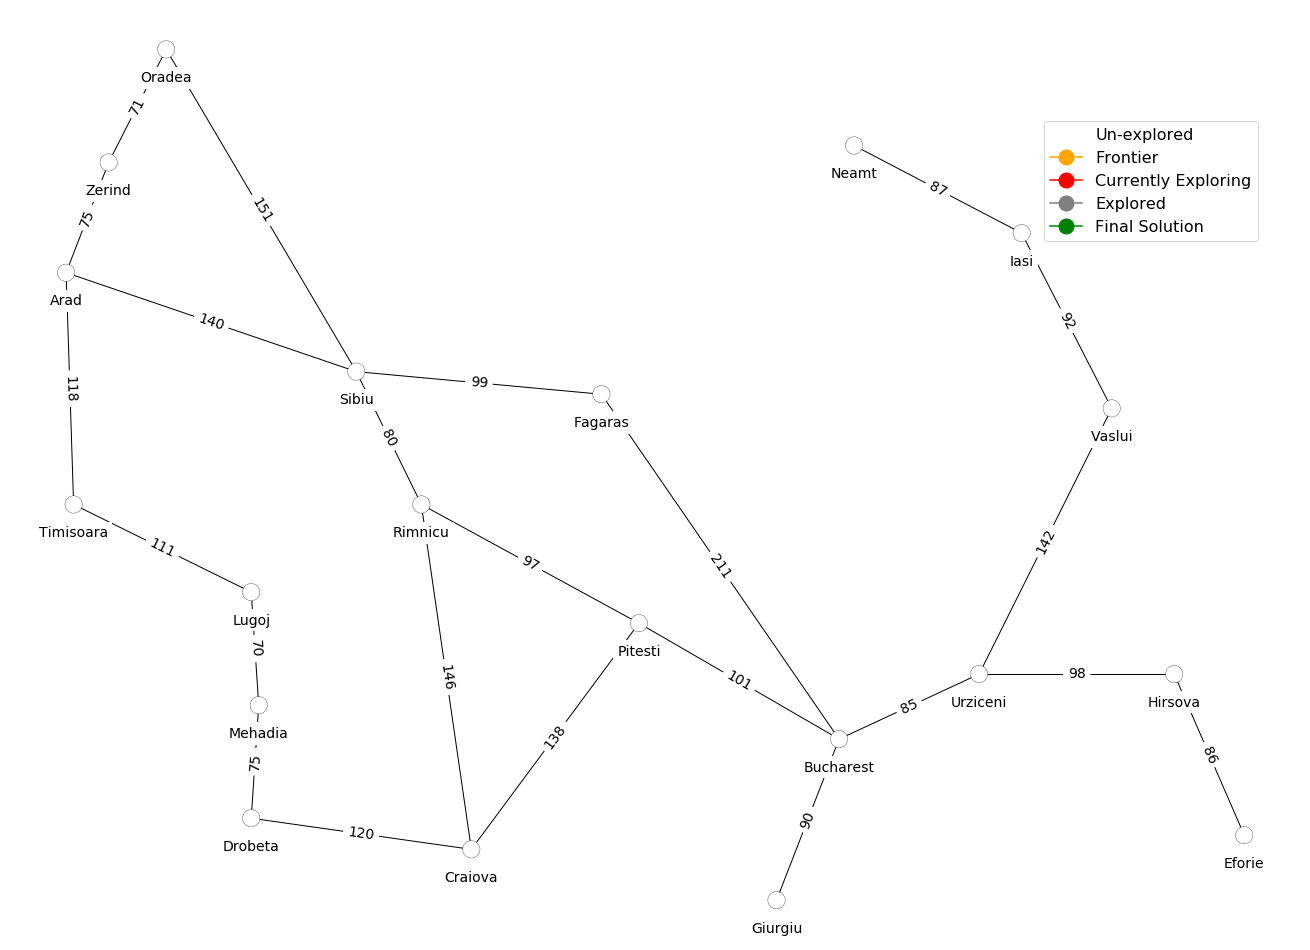

In [41]:
show_map(romania_graph_data)

## VISUALIZACIÓN DE LOS ALGORITMOS DE BUSQUEDA (SEARCHING ALGORITHMS)
---
En esta sección abordamos los poderosos algoritmos que hemos visto:

1. Breadth First Tree Search
2. Depth First Tree Search
3. Breadth First Search
4. Depth First Graph Search
5. Best First Graph Search
6. Uniform Cost Search
7. Depth Limited Search
8. Iterative Deepening Search
9. Greedy Best First Search
9. A\*-Search
10. Recursive Best First Search

---

La cosa será añadir colores a los nodos para ver que está pasando... entonces ->
* Un-explored nodes - <font color='white'>white</font>
* Frontier nodes - <font color='orange'>orange</font>
* Currently exploring node - <font color='red'>red</font>
* Already explored nodes - <font color='gray'>gray</font>

# Esto lo veremos la siguiente clase...

---
## * ¿Qué es una heurística?
     * Disponen de alguna información sobre la proximidad de cada estado a un estado objetivo, lo que permite explorar en primer lugar los caminos más prometedores.
        
Pero... algunas de sus características no prometedoras son:
* No garantizan que se encuentre una solución, aunque sí existan soluciones.
* Si encuentran una solución, no se asegura que ésta tenga las mejores propiedades (que sea de longitud mínima o de coste óptimo).
* En algunas ocasiones (que, en general, no se podrán determinar apriori), encontrarán una solución (aceptablemente buena) en un tiempo razonable.
---
En general, los métodos heurísticos son preferibles a los métodos no informados en la solución de problemas difíciles para los que una búsqueda exhaustiva necesitaría un tiempo demasiado grande. 
Esto cubre prácticamente la totalidad de los problemas reales que interesan en IA.

---

La función heurística puede tener dos interpretaciones. Por una parte, la función puede ser una estimación de lo próximo que se encuentra el estado de un estado objetivo. Bajo esta perspectiva, los estados de menor valor heurístico son los preferidos. Pero en otros casos puede suceder que lo que convenga sea maximizar esa función.